# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this Project, we will be analyzing The Movie database(TMdb) that contains information about 10,000 movies. The columns in the dataset are the following: id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj 


### Question(s) for Analysis
> Which genres are most popular from year to year?

> What kinds of properties are associated with movies that have high revenues?

> Which directors has the highes revenue?

> Which Production Company has the highest revenue?

In [24]:
# This is the set up of import statements for all of the packages that we will use in this project

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [25]:
#load the dataset

df = pd.read_csv('tmdb-movies.csv')

In [26]:
#Check the first few rows of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [27]:
# The first few rows did not show all the columns, We will now show all columns in the dataset
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [28]:
#We have seen that we have 21 columns, let us see the total rows in the dataset
df.shape

(10866, 21)

In [29]:
# Let us check the basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [30]:
# Get the statistics for the dataset

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [31]:
# Check if we have duplicates in the dataset

df.duplicated().sum()

1

In [32]:
# Check for unique values in the dataset

df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning
> In this section we shall look at cleaning the data based on our observations from the wrangling section
 

In [33]:
# Remove columns that are not needed for the analysis

df.drop(['id','imdb_id','original_title','cast','homepage','tagline','keywords','overview','release_date'], axis=1, inplace=True)


In [34]:
df.head()

,popularity,budget,revenue,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [35]:
#Check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


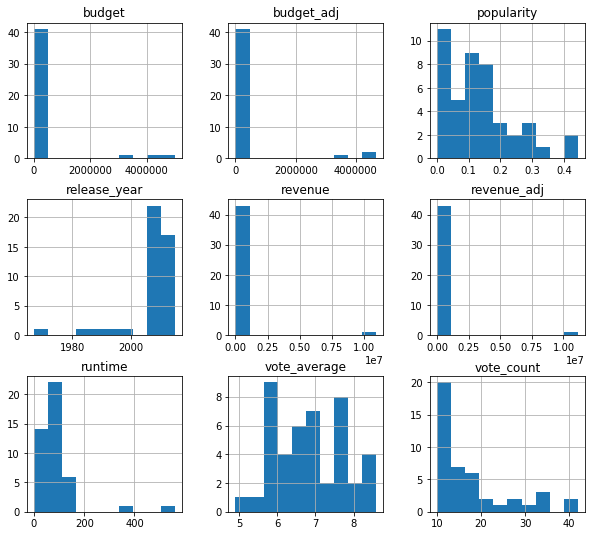

In [36]:
# Investigate movies with missing directors
df[df.director.isnull()].hist(figsize = (10,9));

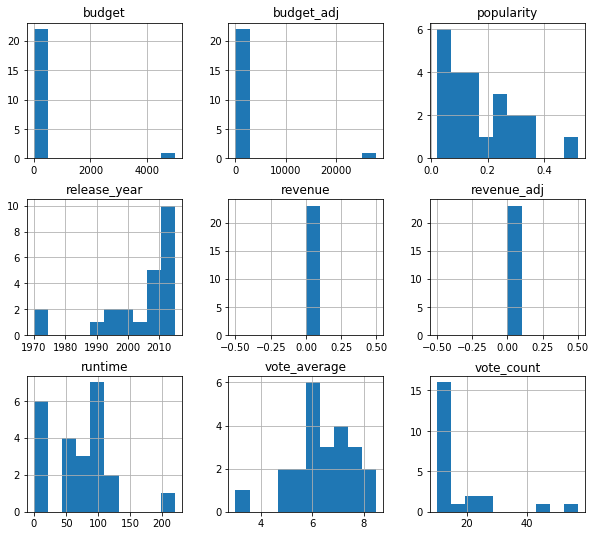

In [37]:
# Investigate movies with missing genres
df[df.genres.isnull()].hist(figsize = (10,9));

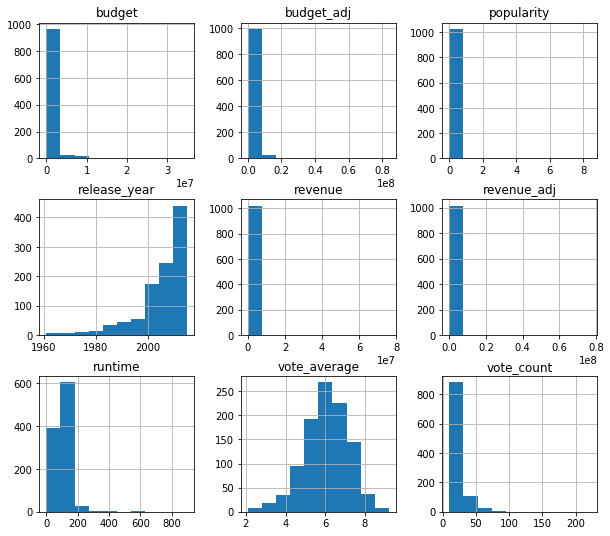

In [38]:
# Investigate movies with missing production_companies
df[df.production_companies.isnull()].hist(figsize = (10,9));

In [39]:
# From the investigation, majority of movies with missing data have zero budget and zero revenue, hence we can drop them
# They won't impact our analysis

df.dropna(inplace = True)
# to show the changes 
df.info()
df.describe()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 12 columns):
popularity              9807 non-null float64
budget                  9807 non-null int64
revenue                 9807 non-null int64
director                9807 non-null object
runtime                 9807 non-null int64
genres                  9807 non-null object
production_companies    9807 non-null object
vote_count              9807 non-null int64
vote_average            9807 non-null float64
release_year            9807 non-null int64
budget_adj              9807 non-null float64
revenue_adj             9807 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 996.0+ KB


,popularity,budget,revenue,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,3935,8.0,2015,1.609999e+08,7.854116e+08


In [40]:
# We also identified one duplicate in the dataset, let us therefore remove the duplicate

# Remove the duplicate
df.drop_duplicates(inplace=True)

# Count duplicate after removal
df.duplicated().sum()

0

In [41]:
# Check the count after removing duplicates

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 12 columns):
popularity              9806 non-null float64
budget                  9806 non-null int64
revenue                 9806 non-null int64
director                9806 non-null object
runtime                 9806 non-null int64
genres                  9806 non-null object
production_companies    9806 non-null object
vote_count              9806 non-null int64
vote_average            9806 non-null float64
release_year            9806 non-null int64
budget_adj              9806 non-null float64
revenue_adj             9806 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 995.9+ KB


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9806.000000,9.806000e+03,9.806000e+03,9806.000000,9806.000000,9806.000000,9806.000000,9.806000e+03,9.806000e+03
mean,0.693143,1.612525e+07,4.407785e+07,102.744340,238.622578,5.966459,2000.890271,1.935070e+07,5.685528e+07
std,1.035525,3.216819e+07,1.224038e+08,28.134561,602.081472,0.914291,13.032372,3.562179e+07,1.512243e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.231581,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.418755,1.403930e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,2.410618e+05,0.000000e+00
75%,0.774232,1.900000e+07,3.064621e+07,112.000000,172.000000,6.600000,2011.000000,2.439107e+07,4.255193e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> We are going to explore the data to answer the questions for the analysis


### Research Question 1 (What kinds of properties are associated with movies that have high revenues?)

In [42]:
# considerably movie with high revenues are the ones that are over 75% 
high_revenues = df.revenue >=3.064621e+07

# Movie with low revenues are the one that are lower than 75%
low_revenues = df.revenue < 3.064621e+07


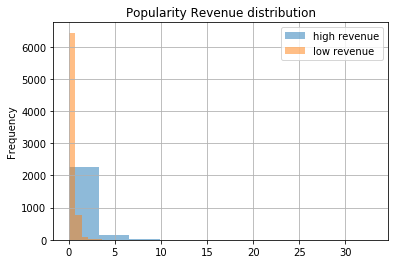

In [43]:
# Check the impact of popularity on low and high revenue movies

df.popularity[high_revenues].plot(kind='hist', alpha = 0.5, label = 'high revenue', title='Popularity Revenue distribution')
df.popularity[low_revenues].hist(alpha = 0.5, label = 'low revenue')
plt.legend();

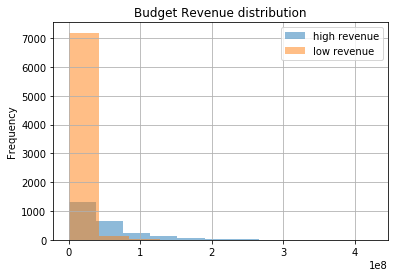

In [44]:
# Check the impact of budget on low and high revenue movies

df.budget[high_revenues].plot(kind='hist', alpha = 0.5, label = 'high revenue', title='Budget Revenue distribution')
df.budget[low_revenues].hist(alpha = 0.5, label = 'low revenue')
plt.legend();

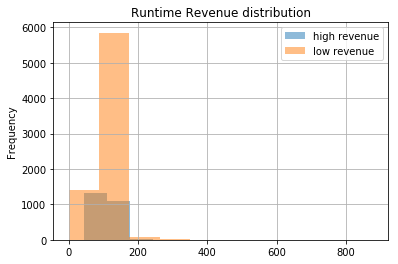

In [45]:
# How does runtime impact revenue

df.runtime[high_revenues].plot(kind='hist', alpha = 0.5, label = 'high revenue', title='Runtime Revenue distribution')
df.runtime[low_revenues].hist(alpha = 0.5, label = 'low revenue')
plt.legend();

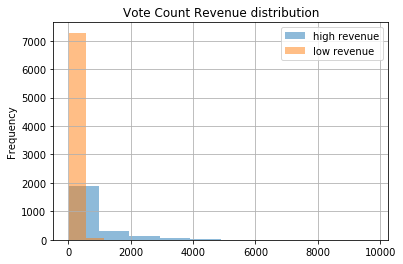

In [46]:
# How does vote_count impact revenue?

df.vote_count[high_revenues].plot(kind='hist', alpha = 0.5, label = 'high revenue', title='Vote Count Revenue distribution')
df.vote_count[low_revenues].hist(alpha = 0.5, label = 'low revenue')
plt.legend();

### Research Question 2  (Which genres are most popular from year to year?)

In [47]:
# Let us examine the genres and revenue
genres_yoy = (df.groupby('release_year')['genres']
                  .apply(lambda x: x.value_counts().index[0])
                  .reset_index())
genres_yoy


,release_year,genres
0,1960,Horror
1,1961,Horror
2,1962,Drama
3,1963,Horror
4,1964,Comedy|Romance
5,1965,Drama
6,1966,Action|Western
7,1967,Comedy|Drama|Romance
8,1968,Drama
9,1969,Drama


### Research Question 3  (Which directors has the highest revenue?)

In [48]:
# Check directors with highest revenue movies

df.groupby(['director'])['revenue'].sum().sort_values(ascending=False)

director
Steven Spielberg            9018563772
Peter Jackson               6523244659
James Cameron               5841894863
Michael Bay                 4917208171
Christopher Nolan           4167548502
David Yates                 4154295625
Robert Zemeckis             3869690869
Chris Columbus              3851491668
Tim Burton                  3665414624
Ridley Scott                3649996480
J.J. Abrams                 3579169916
Gore Verbinski              3548779679
Ron Howard                  3484471847
Roland Emmerich             3393325574
George Lucas                3316550893
Sam Raimi                   3193820360
Francis Lawrence            3179979588
Joss Whedon                 2963463141
Clint Eastwood              2824871255
Sam Mendes                  2713548809
Carlos Saldanha             2532451792
M. Night Shyamalan          2452354930
Barry Sonnenfeld            2340032223
Shawn Levy                  2218587063
Steven Soderbergh           2159381666
David Fincher   

### Research Question 3  (Which production company has the highest revenue?)

In [49]:
df.groupby(['production_companies'])['revenue'].sum().sort_values(ascending=False)

production_companies
Paramount Pictures                                                                                            8097344275
Walt Disney Pictures|Pixar Animation Studios                                                                  7648558520
DreamWorks Animation                                                                                          6676741096
Marvel Studios                                                                                                6047908966
Columbia Pictures                                                                                             4925479137
Blue Sky Studios|Twentieth Century Fox Animation                                                              3938820202
Universal Pictures                                                                                            3792411919
Walt Disney Pictures|Walt Disney Animation Studios                                                            3498726837
Universal P

<a id='conclusions'></a>
## Conclusions

> In conclusion, we can see that the revenue is positively correlated with the budget, popularity and runtime value. We also saw that Comedy and drama have year on year popularity among the genres. We also explored the directors to know if the directors that have highest revenues and also production companies. This insight shows us that production companies also have a correlation with revenue and also the directors

> Limitations such as null values didn't allow for extra understanding of the dataset as we needed to drop them since they have low impact this in turn affected our values for revenue. In addition, there were multiple overlapping values in genre which limited our exploration of genre further